In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import missingno as ms
import skimage.io as io
import skimage
import sklearn.preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


from sklearn import metrics

import itertools

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("data/Train_data.csv")
test = pd.read_csv("data/Test_data.csv")

# Exploration

In [3]:
print('rows in train: %s \ncolumns in train: %s' %(train.shape[0], train.shape[1]))

rows in train: 25192 
columns in train: 42


In [4]:
train.describe()

duration     src_bytes     dst_bytes          land  wrong_fragment  \
count  25192.000000  2.519200e+04  2.519200e+04  25192.000000    25192.000000   
mean     305.054104  2.433063e+04  3.491847e+03      0.000079        0.023738   
std     2686.555640  2.410805e+06  8.883072e+04      0.008910        0.260221   
min        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
25%        0.000000  0.000000e+00  0.000000e+00      0.000000        0.000000   
50%        0.000000  4.400000e+01  0.000000e+00      0.000000        0.000000   
75%        0.000000  2.790000e+02  5.302500e+02      0.000000        0.000000   
max    42862.000000  3.817091e+08  5.151385e+06      1.000000        3.000000   

            urgent           hot  num_failed_logins     logged_in  \
count  25192.00000  25192.000000       25192.000000  25192.000000   
mean       0.00004      0.198039           0.001191      0.394768   
std        0.00630      2.154202           0.045418      0.488811   
min        0.00000      0.000000           0.000000      0.000000   
25%        0.00000      0.000000           0.000000      0.000000   
50%        0.00000      0.000000           0.000000      0.000000   
75%        0.00000      0.000000           0.000000      1.000000   
max        1.00000     77.000000           4.000000      1.000000   

       num_compromised  ...  dst_host_count  dst_host_srv_count  \
count     25192.000000  ...    25192.000000        25192.000000   
mean          0.227850  ...      182.532074          115.063036   
std          10.417352  ...       98.993895          110.646850   
min           0.000000  ...        0.000000            0.000000   
25%           0.000000  ...       84.000000           10.000000   
50%           0.000000  ...      255.000000           61.000000   
75%           0.000000  ...      255.000000          255.000000   
max         884.000000  ...      255.000000          255.000000   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
count            25192.000000            25192.000000   
mean                 0.519791                0.082539   
std                  0.448944                0.187191   
min                  0.000000                0.000000   
25%                  0.050000                0.000000   
50%                  0.510000                0.030000   
75%                  1.000000                0.070000   
max                  1.000000                1.000000   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
count                 25192.000000                 25192.000000   
mean                      0.147453                     0.031844   
std                       0.308367                     0.110575   
min                       0.000000                     0.000000   
25%                       0.000000                     0.000000   
50%                       0.000000                     0.000000   
75%                       0.060000                     0.020000   
max                       1.000000                     1.000000   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
count          25192.000000              25192.000000          25192.000000   
mean               0.285800                  0.279846              0.117800   
std                0.445316                  0.446075              0.305869   
min                0.000000                  0.000000              0.000000   
25%                0.000000                  0.000000              0.000000   
50%                0.000000                  0.000000              0.000000   
75%                1.000000                  1.000000              0.000000   
max                1.000000                  1.000000              1.000000   

       dst_host_srv_rerror_rate  
count              25192.000000  
mean                   0.118769  
std                    0.317333  
min                    0.000000  
25%                    0.000000  
50%                  

## Univariate Analysis

In [5]:
train.columns.tolist()

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'class']

In [6]:
train.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [7]:
discrete_data = train.select_dtypes(include=['int64']).copy()
discrete_data

duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0             0        491          0     0               0       0    0   
1             0        146          0     0               0       0    0   
2             0          0          0     0               0       0    0   
3             0        232       8153     0               0       0    0   
4             0        199        420     0               0       0    0   
...         ...        ...        ...   ...             ...     ...  ...   
25187         0          0          0     0               0       0    0   
25188         0        334          0     0               0       0    0   
25189         0          0          0     0               0       0    0   
25190         0          0          0     0               0       0    0   
25191         0          0          0     0               0       0    0   

       num_failed_logins  logged_in  num_compromised  ...  num_file_creations  \
0                      0          0                0  ...                   0   
1                      0          0                0  ...                   0   
2                      0          0                0  ...                   0   
3                      0          1                0  ...                   0   
4                      0          1                0  ...                   0   
...                  ...        ...              ...  ...                 ...   
25187                  0          0                0  ...                   0   
25188                  0          1                0  ...                   0   
25189                  0          0                0  ...                   0   
25190                  0          0                0  ...                   0   
25191                  0          0                0  ...                   0   

       num_shells  num_access_files  num_outbound_cmds  is_host_login  \
0               0                 0                  0              0   
1               0                 0                  0              0   
2               0                 0                  0              0   
3               0                 0                  0              0   
4               0                 0                  0              0   
...           ...               ...                ...            ...   
25187           0                 0                  0              0   
25188           0                 0                  0              0   
25189           0                 0                  0              0   
25190           0                 0                  0              0   
25191           0                 0                  0              0   

       is_guest_login  count  srv_count  dst_host_count  dst_host_srv_count  
0                   0      2          2             150                  25  
1                   0     13          1             255                   1  
2                   0    123          6             255                  26  
3                   0      5          5              30                 255  
4                   0     30         32             255                 255  
...               ...    ...        ...             ...                 ...  
25187               0    100          7             255                   7  
25188               0      1          1               1                  39  
25189               0    105          7             255                  13  
25190               0    129         18             255                  20  
25191               0     38          9             255                  49  

[25192 rows x 23 columns]

In [8]:
discrete_column_arr = []

for i in train.columns.tolist():
    if train[i].dtype == int:
        discrete_column_arr.append(i)
        
discrete_dict = {}
binary_column_arr = []

for i in discrete_column_arr:
    discrete_dict[i] = len(train[i].unique().tolist())
    
for key,val in discrete_dict.items():
    if val == 2:
        binary_column_arr.append(key)

for i in binary_column_arr:
    train[i] = train[i].astype("bool")
    
binary_data = train.select_dtypes(include=['bool']).copy()
binary_data

land  urgent  logged_in  root_shell  num_shells  is_guest_login
0      False   False      False       False       False           False
1      False   False      False       False       False           False
2      False   False      False       False       False           False
3      False   False       True       False       False           False
4      False   False       True       False       False           False
...      ...     ...        ...         ...         ...             ...
25187  False   False      False       False       False           False
25188  False   False       True       False       False           False
25189  False   False      False       False       False           False
25190  False   False      False       False       False           False
25191  False   False      False       False       False           False

[25192 rows x 6 columns]

In [9]:
continuous_data = train.select_dtypes(include=['float64']).copy()
continuous_data

serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  \
0              0.0              0.0          0.0              0.0   
1              0.0              0.0          0.0              0.0   
2              1.0              1.0          0.0              0.0   
3              0.2              0.2          0.0              0.0   
4              0.0              0.0          0.0              0.0   
...            ...              ...          ...              ...   
25187          0.0              0.0          1.0              1.0   
25188          0.0              0.0          0.0              0.0   
25189          0.0              0.0          1.0              1.0   
25190          1.0              1.0          0.0              0.0   
25191          1.0              1.0          0.0              0.0   

       same_srv_rate  diff_srv_rate  srv_diff_host_rate  \
0               1.00           0.00                0.00   
1               0.08           0.15                0.00   
2               0.05           0.07                0.00   
3               1.00           0.00                0.00   
4               1.00           0.00                0.09   
...              ...            ...                 ...   
25187           0.07           0.07                0.00   
25188           1.00           0.00                0.00   
25189           0.07           0.07                0.00   
25190           0.14           0.06                0.00   
25191           0.24           0.11                0.00   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                        0.17                    0.03   
1                        0.00                    0.60   
2                        0.10                    0.05   
3                        1.00                    0.00   
4                        1.00                    0.00   
...                       ...                     ...   
25187                    0.03                    0.06   
25188                    1.00                    0.00   
25189                    0.05                    0.07   
25190                    0.08                    0.06   
25191                    0.19                    0.03   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                             0.17                         0.00   
1                             0.88                         0.00   
2                             0.00                         0.00   
3                             0.03                         0.04   
4                             0.00                         0.00   
...                            ...                          ...   
25187                         0.00                         0.00   
25188                         1.00                         0.18   
25189                         0.00                         0.00   
25190                         0.00                         0.00   
25191                         0.01                         0.00   

       dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                      0.00                      0.00                  0.05   
1                      0.00                      0.00                  0.00   
2                      1.00                      1.00                  0.00   
3                      0.03                      0.01                  0.00   
4                      0.00                      0.00                  0.00   
...                     ...                       ...                   ...   
25187                  0.00                      0.00                  1.00   
25188                  0.00                      0.00                  0.00   
25189                  0.00                      0.00                  1.00   
25190                  1.00                      1.00                  0.00   
25191                  1.00                      1.00                  0.00   

       dst_host_srv_rerror_rat

## Scaling Numerical Features

In [10]:
numerical_scaled_data = StandardScaler().fit_transform(train.select_dtypes(include=['float64','int64']))
numerical_train_df = pd.DataFrame(numerical_scaled_data, columns = train.select_dtypes(include=['float64','int64']).columns)
numerical_train_df

duration  src_bytes  dst_bytes  wrong_fragment       hot  \
0     -0.113551  -0.009889  -0.039310       -0.091223 -0.091933   
1     -0.113551  -0.010032  -0.039310       -0.091223 -0.091933   
2     -0.113551  -0.010093  -0.039310       -0.091223 -0.091933   
3     -0.113551  -0.009996   0.052473       -0.091223 -0.091933   
4     -0.113551  -0.010010  -0.034582       -0.091223 -0.091933   
...         ...        ...        ...             ...       ...   
25187 -0.113551  -0.010093  -0.039310       -0.091223 -0.091933   
25188 -0.113551  -0.009954  -0.039310       -0.091223 -0.091933   
25189 -0.113551  -0.010093  -0.039310       -0.091223 -0.091933   
25190 -0.113551  -0.010093  -0.039310       -0.091223 -0.091933   
25191 -0.113551  -0.010093  -0.039310       -0.091223 -0.091933   

       num_failed_logins  num_compromised  su_attempted  num_root  \
0               -0.02622        -0.021873     -0.027665 -0.021724   
1               -0.02622        -0.021873     -0.027665 -0.021724   
2               -0.02622        -0.021873     -0.027665 -0.021724   
3               -0.02622        -0.021873     -0.027665 -0.021724   
4               -0.02622        -0.021873     -0.027665 -0.021724   
...                  ...              ...           ...       ...   
25187           -0.02622        -0.021873     -0.027665 -0.021724   
25188           -0.02622        -0.021873     -0.027665 -0.021724   
25189           -0.02622        -0.021873     -0.027665 -0.021724   
25190           -0.02622        -0.021873     -0.027665 -0.021724   
25191           -0.02622        -0.021873     -0.027665 -0.021724   

       num_file_creations  ...  dst_host_count  dst_host_srv_count  \
0               -0.027808  ...       -0.328634           -0.813985   
1               -0.027808  ...        0.732059           -1.030895   
2               -0.027808  ...        0.732059           -0.804947   
3               -0.027808  ...       -1.540854            1.264742   
4               -0.027808  ...        0.732059            1.264742   
...                   ...  ...             ...                 ...   
25187           -0.027808  ...        0.732059           -0.976667   
25188           -0.027808  ...       -1.833807           -0.687453   
25189           -0.027808  ...        0.732059           -0.922440   
25190           -0.027808  ...        0.732059           -0.859174   
25191           -0.027808  ...        0.732059           -0.597074   

       dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                   -0.779157               -0.280673   
1                   -1.157831                2.764403   
2                   -0.935081               -0.173828   
3                    1.069663               -0.440940   
4                    1.069663               -0.440940   
...                       ...                     ...   
25187               -1.091006               -0.120406   
25188                1.069663               -0.440940   
25189               -1.046456               -0.066984   
25190               -0.979631               -0.120406   
25191               -0.734607               -0.280673   

       dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                         0.073120                    -0.287993   
1                         2.375620                    -0.287993   
2                        -0.478183                    -0.287993   
3                        -0.380894                     0.073759   
4                        -0.478183                    -0.287993   
...                            ...                          ...   
25187                    -0.478183                    -0.287993   
25188                     2.764775                     1.339894   
25189                    -0.478183                    -0.287993   
25190                    -0.478183                    -0.287993   
25191                    -0.445754                    -0.287993   

       dst_host_serror_rate  dst_host_srv_

In [11]:
categorical_column_arr = []

for i in train.columns.tolist():
    if train[i].dtype == object:
        categorical_column_arr.append(i)
        
for i in categorical_column_arr:
    train[i] = train[i].astype("category")

categorical_data = train.select_dtypes(include=['category']).copy()

categorical_data

protocol_type   service  flag    class
0               tcp  ftp_data    SF   normal
1               udp     other    SF   normal
2               tcp   private    S0  anomaly
3               tcp      http    SF   normal
4               tcp      http    SF   normal
...             ...       ...   ...      ...
25187           tcp      exec  RSTO  anomaly
25188           tcp  ftp_data    SF  anomaly
25189           tcp   private   REJ  anomaly
25190           tcp      nnsp    S0  anomaly
25191           tcp    finger    S0  anomaly

[25192 rows x 4 columns]

In [12]:
for i in categorical_column_arr:
    print("%s: %s" %(i, train[i].unique().tolist()))

protocol_type: ['tcp', 'udp', 'icmp']
service: ['ftp_data', 'other', 'private', 'http', 'remote_job', 'name', 'netbios_ns', 'eco_i', 'mtp', 'telnet', 'finger', 'domain_u', 'supdup', 'uucp_path', 'Z39_50', 'smtp', 'csnet_ns', 'uucp', 'netbios_dgm', 'urp_i', 'auth', 'domain', 'ftp', 'bgp', 'ldap', 'ecr_i', 'gopher', 'vmnet', 'systat', 'http_443', 'efs', 'whois', 'imap4', 'iso_tsap', 'echo', 'klogin', 'link', 'sunrpc', 'login', 'kshell', 'sql_net', 'time', 'hostnames', 'exec', 'ntp_u', 'discard', 'nntp', 'courier', 'ctf', 'ssh', 'daytime', 'shell', 'netstat', 'pop_3', 'nnsp', 'IRC', 'pop_2', 'printer', 'tim_i', 'pm_dump', 'red_i', 'netbios_ssn', 'rje', 'X11', 'urh_i', 'http_8001']
flag: ['SF', 'S0', 'REJ', 'RSTR', 'SH', 'RSTO', 'S1', 'RSTOS0', 'S3', 'S2', 'OTH']
class: ['normal', 'anomaly']


## Transforming Categorical Features

In [13]:
categorical_transformed_data = train.select_dtypes(include=['category']).copy().apply(LabelEncoder().fit_transform)
categorical_train_df = categorical_transformed_data.drop(['class'], axis=1)
categorical_train_df

protocol_type  service  flag
0                  1       19     9
1                  2       41     9
2                  1       46     5
3                  1       22     9
4                  1       22     9
...              ...      ...   ...
25187              1       16     2
25188              1       19     9
25189              1       46     1
25190              1       38     5
25191              1       17     5

[25192 rows x 3 columns]

In [14]:
train['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

## Missing Data

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

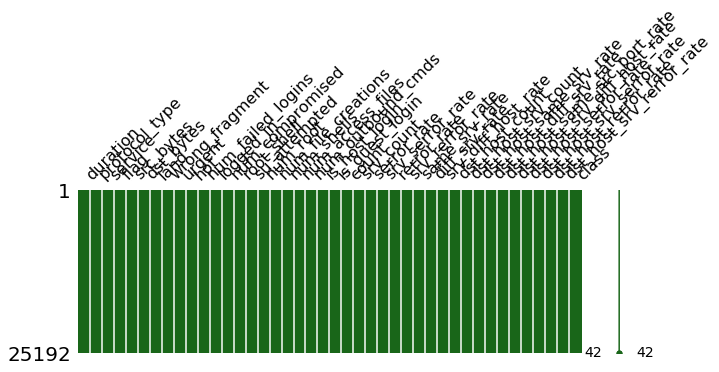

In [15]:
print(train.isnull().sum())
ms.matrix(train,figsize=(10,3), color = (0.1, 0.4, 0.1))

## Distribution feel

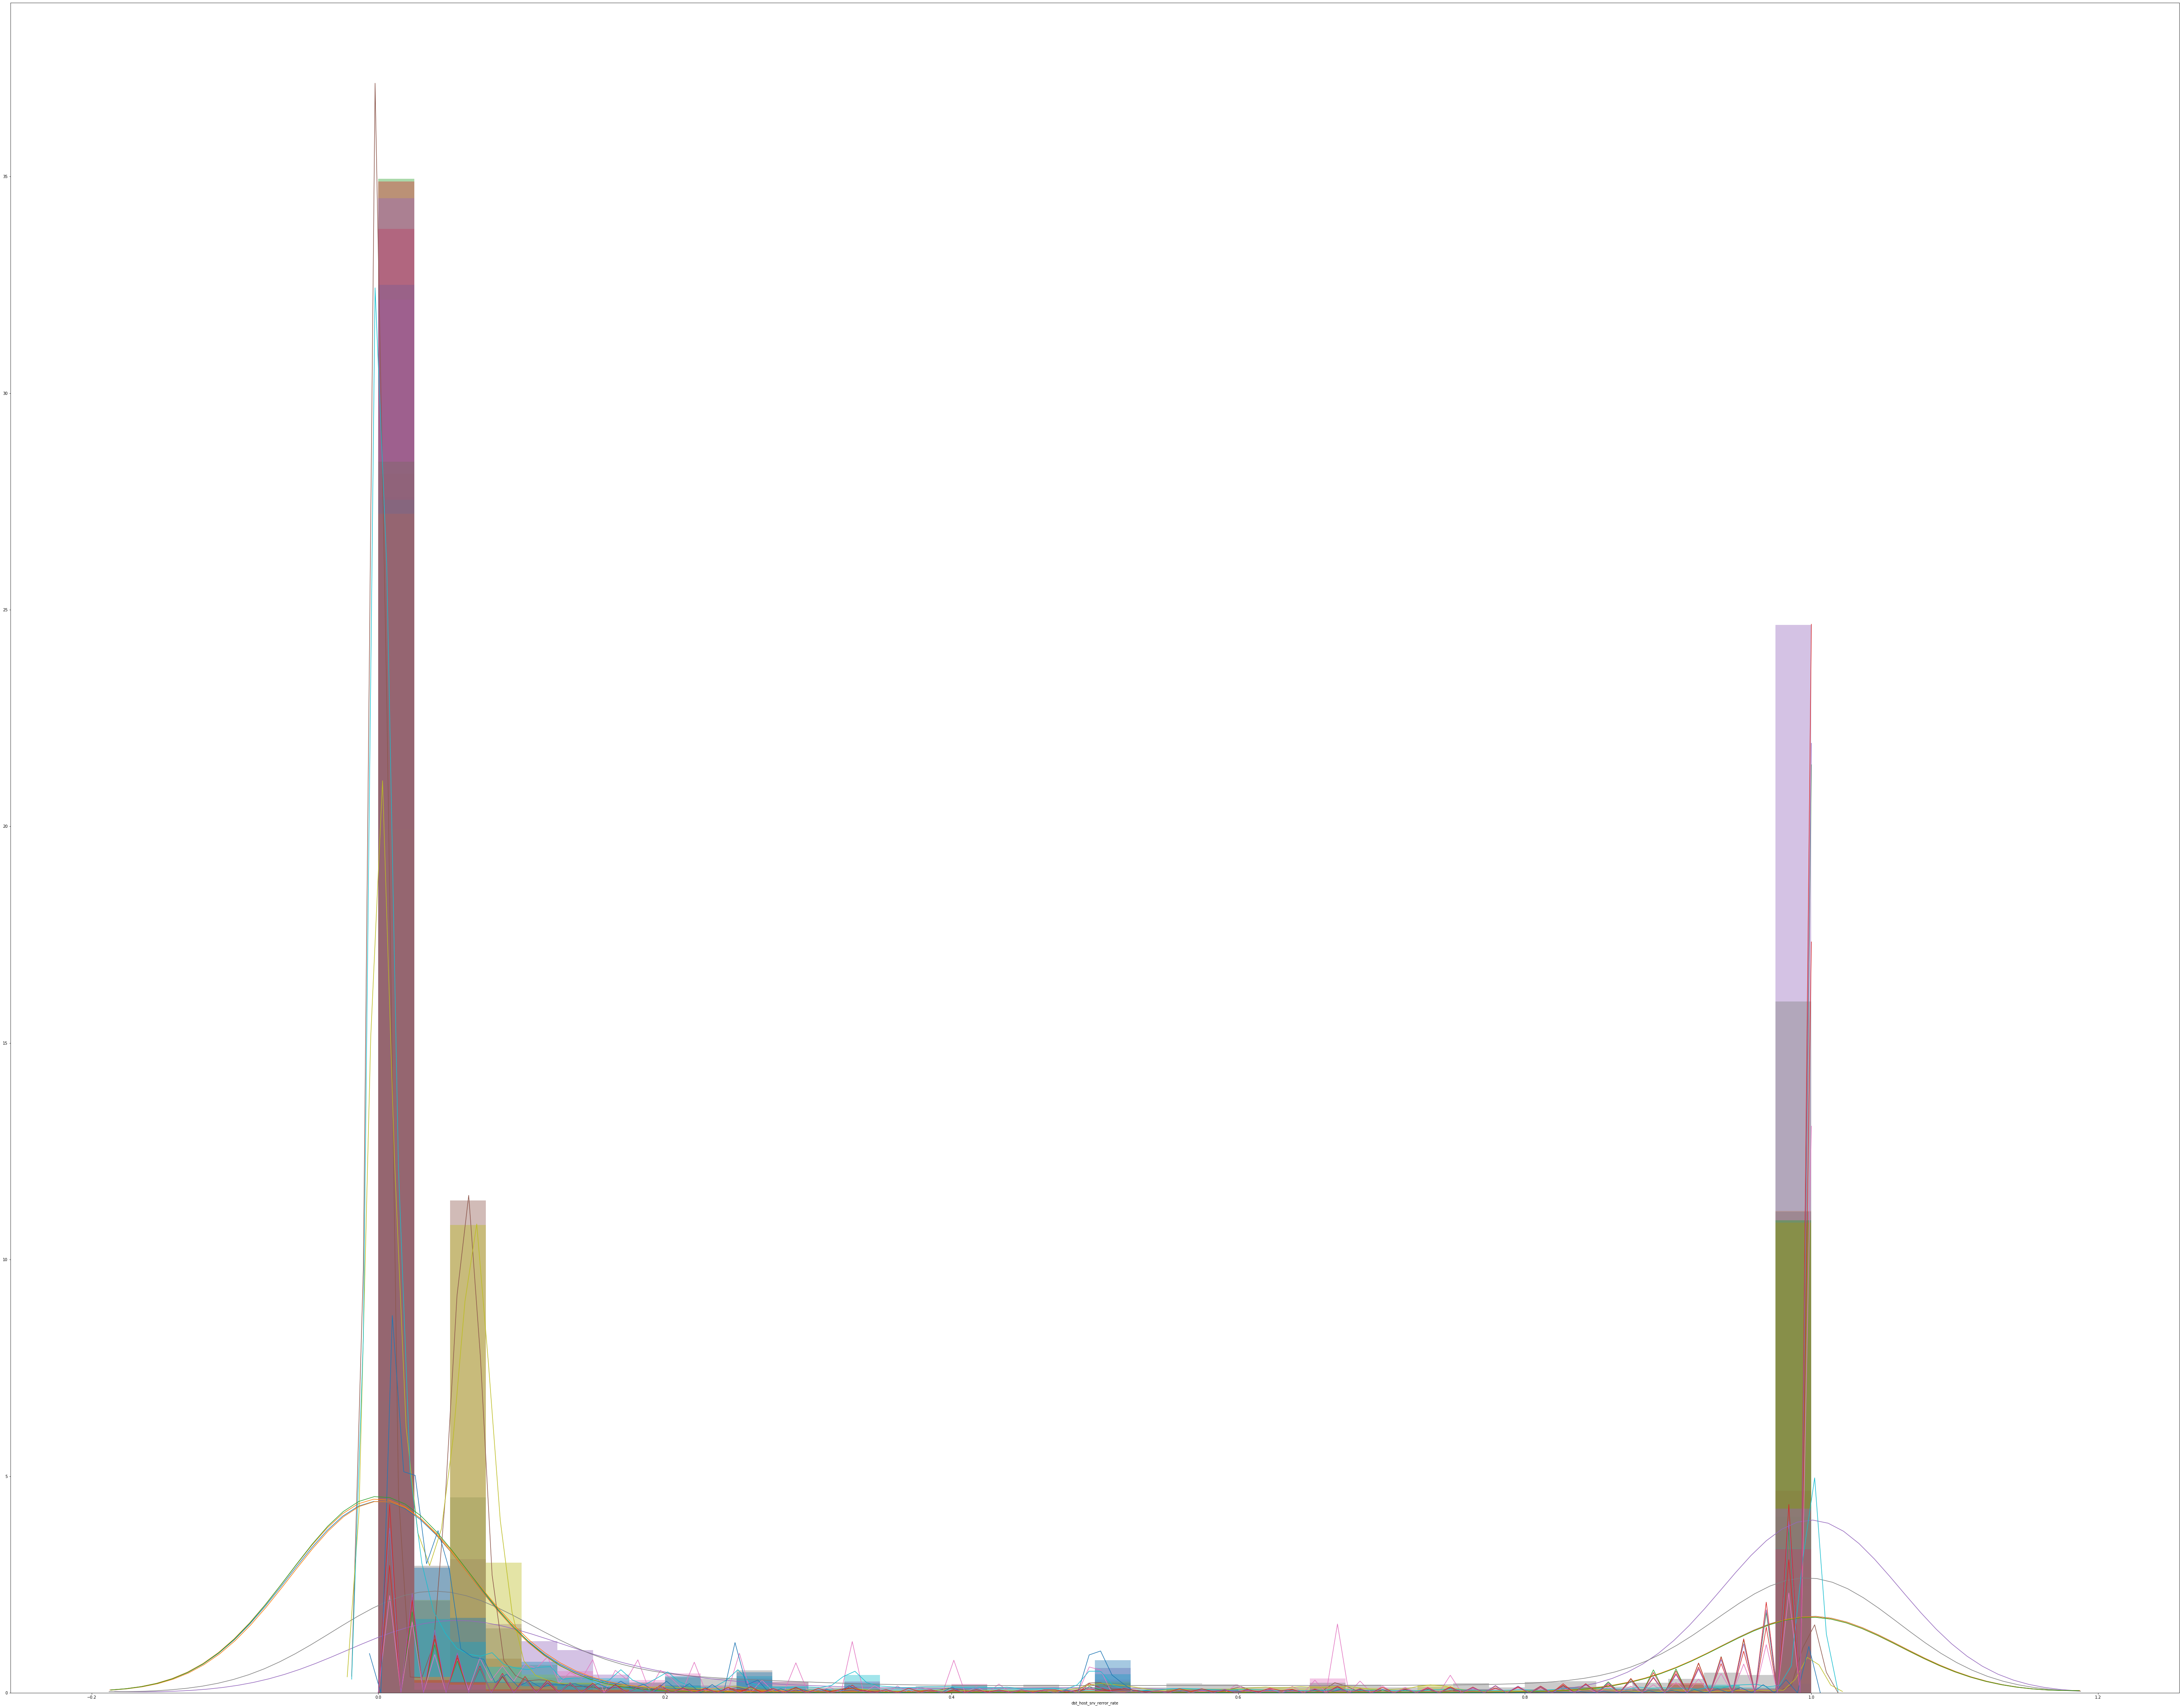

In [16]:
plt.figure(figsize=(100, 80))
for i in continuous_data.columns.tolist():
    sb.distplot(continuous_data[i], bins=40, hist_kws={'alpha': 0.4})

## Cleaning

In [17]:
y_train = categorical_transformed_data[['class']].copy()
y_train.shape

(25192, 1)

In [18]:
x_train = pd.concat([numerical_train_df,categorical_train_df],axis=1)
x_train.shape

(25192, 35)

# Feature Selection

['src_bytes',
 'dst_bytes',
 'hot',
 'count',
 'srv_count',
 'same_srv_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'protocol_type',
 'service',
 'flag']

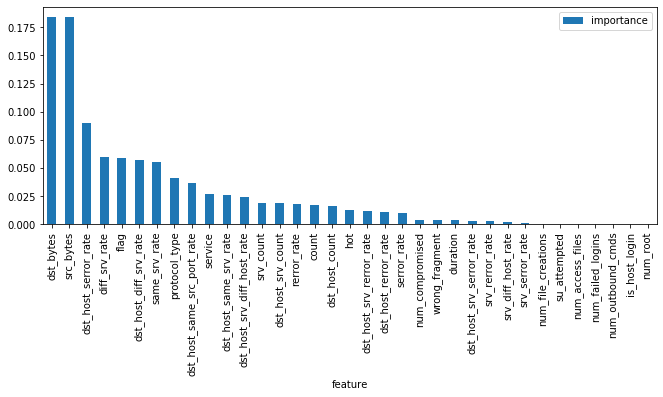

In [19]:
rfc = RandomForestClassifier();

rfc.fit(x_train, y_train);
feature_importance = pd.DataFrame({'feature':x_train.columns,'importance':np.round(rfc.feature_importances_,3)})
feature_importance = feature_importance.sort_values('importance',ascending=False).set_index('feature')
plt.rcParams['figure.figsize'] = (11, 4)
feature_importance.plot.bar()

rfe = RFE(rfc, n_features_to_select=15).fit(x_train, y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), x_train.columns)]
final_features_selected = [v for i, v in feature_map if i==True]

final_features_selected

In [20]:
X = x_train[final_features_selected]

In [ ]:
## Correlations

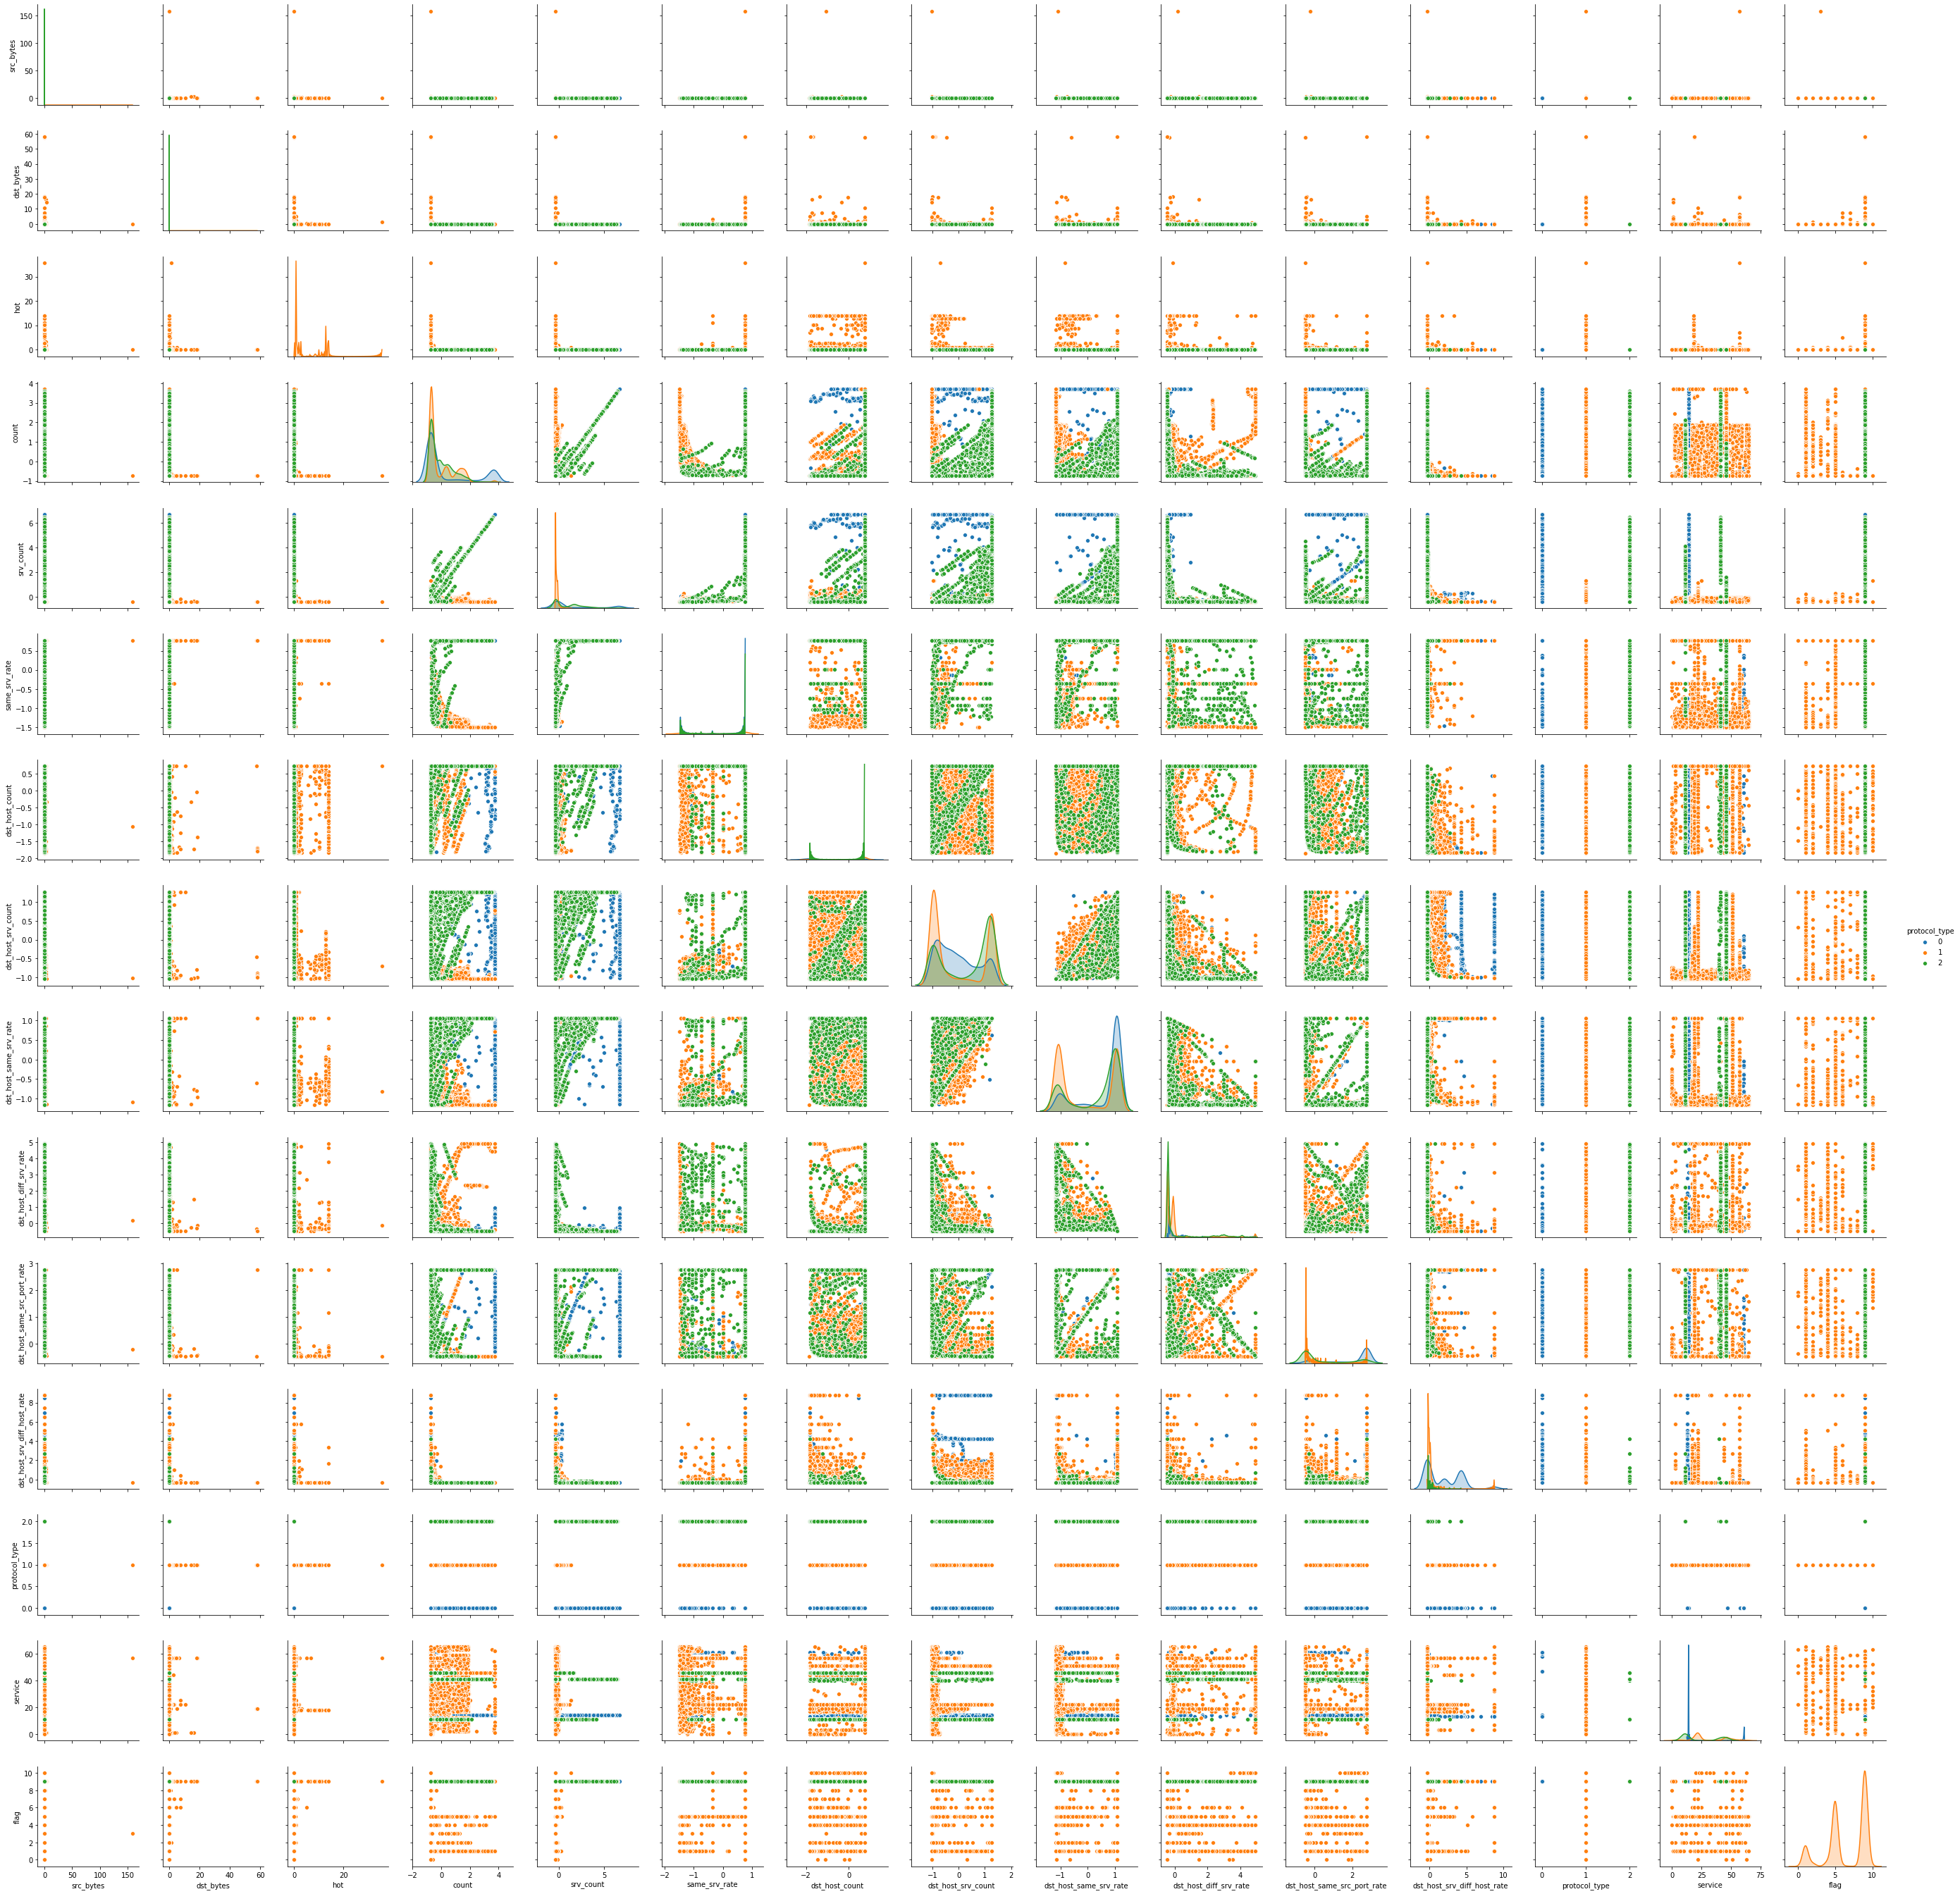

In [21]:
sb.pairplot(X, hue='protocol_type', height=2.5)

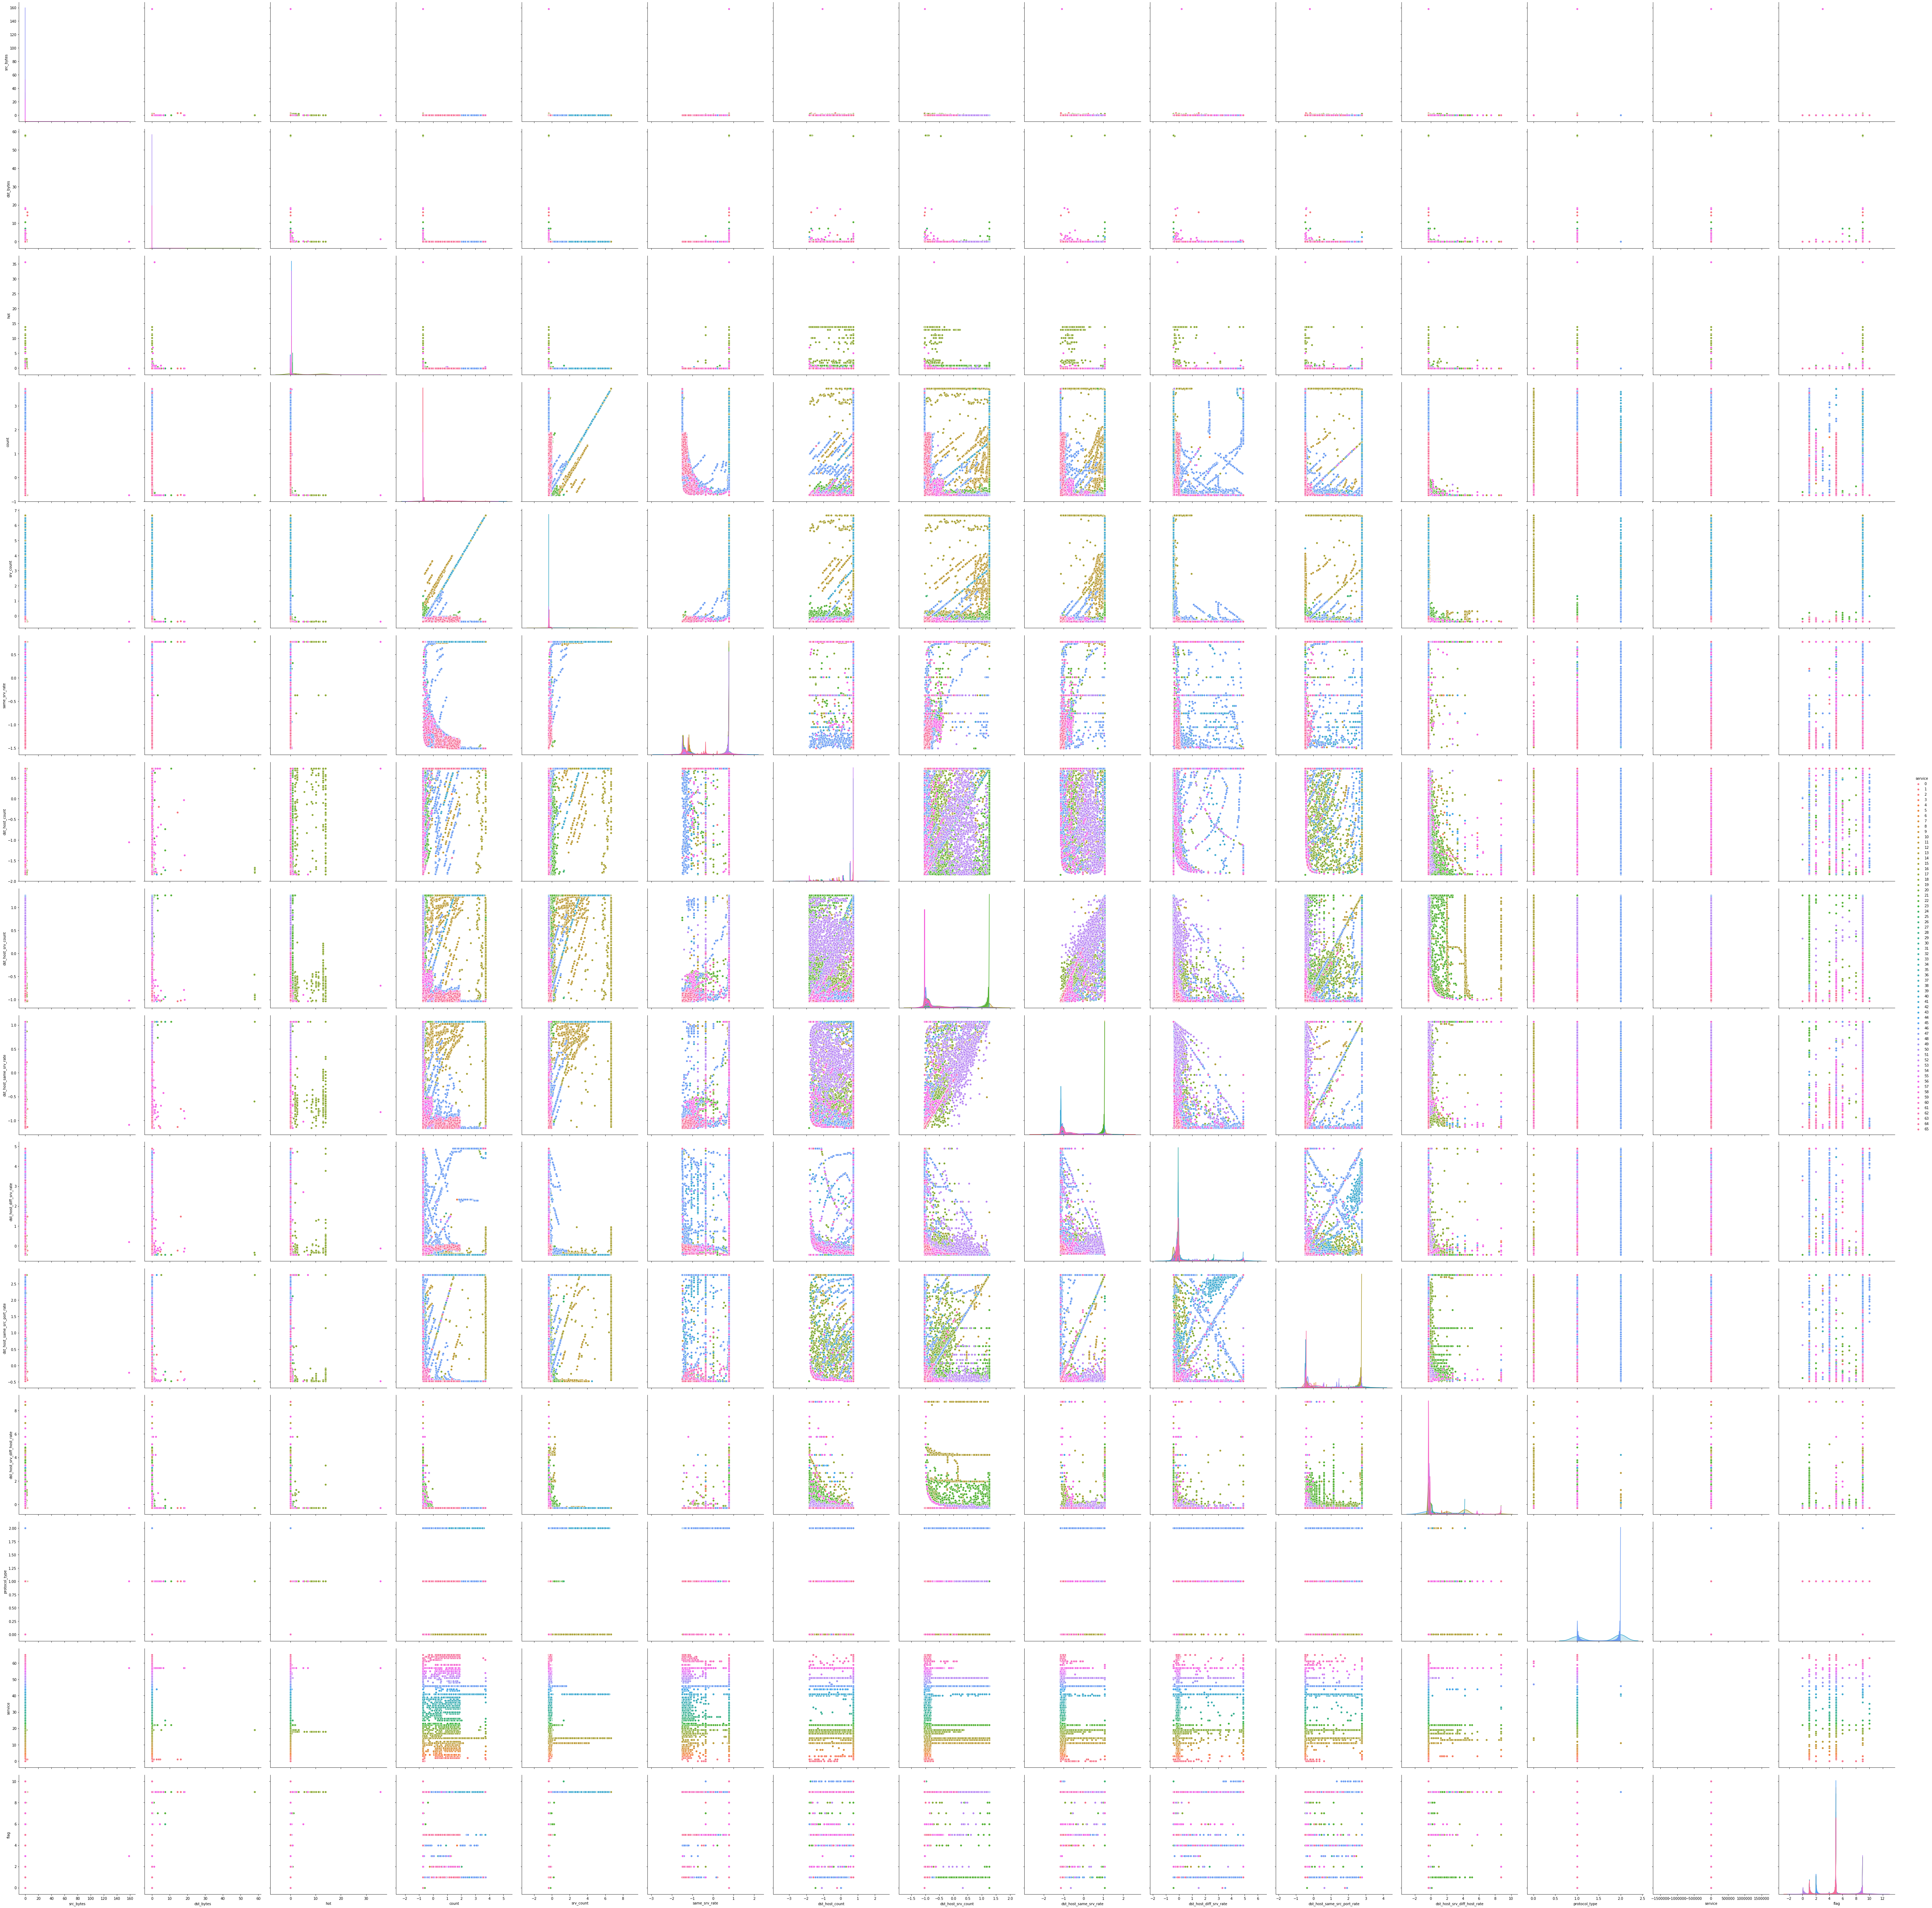

In [31]:
sb.pairplot(X, hue='service', height=5)

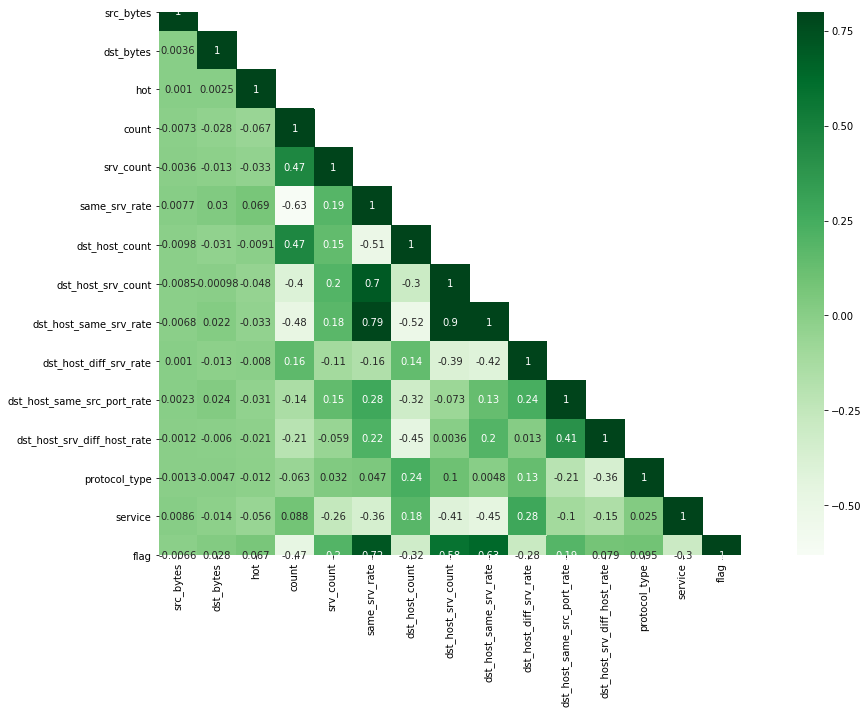

In [33]:
corrMatt = X.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sb.heatmap(corrMatt, cmap="Greens", mask=mask,vmax=.8, square=True,annot=True)

# Modeling

## Train-Test Split

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y_train,train_size=0.70, random_state=2)

## Models Fitting

In [23]:
SVC_Classifier = SVC(kernel='linear')
SVC_Classifier.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [24]:
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

In [25]:
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

In [26]:
models = []
models.append(('SVM Classifier', SVC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

## Model Evaluation

In [27]:
for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print ("Results for %s :" %i, "\n")

    print ("Model Accuracy:" "\n", accuracy)
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print("Confusion matrix:" "\n", confusion_matrix)
    print("Classification report:" "\n", classification)

Results for SVM Classifier : 

Model Accuracy:
 0.9361460814335942
Cross Validation Mean Score:
 0.9356362738914402
Confusion matrix:
 [[7549  696]
 [ 430 8959]]
Classification report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      8245
           1       0.93      0.95      0.94      9389

    accuracy                           0.94     17634
   macro avg       0.94      0.93      0.94     17634
weighted avg       0.94      0.94      0.94     17634

Results for KNeighborsClassifier : 

Model Accuracy:
 0.9938187592151525
Cross Validation Mean Score:
 0.9907568071428632
Confusion matrix:
 [[8182   63]
 [  46 9343]]
Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8245
           1       0.99      1.00      0.99      9389

    accuracy                           0.99     17634
   macro avg       0.99      0.99      0.99     17634
weighted avg       0.99